# Import Libraries

In [1]:
%config IPCompleter.greedy=True
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())
# import os.path
# from pathlib import Path
# Path(os.getcwd()).resolve().as_posix()

Model execution started at:Sat Jul  1 05:48:10 2023


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.albumentationstransforms as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.customcompose as customcompose

C:\Users\abhij\anaconda3\envs\pytorch\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
# !nvidia-smi --query-gpu=gpu_name,gpu_bus_id,vbios_version --format=csv
# showsysteminfo()
import torch
print(torch.__version__)

2.0.1


In [6]:
# mean,std= utils.Utils.calculatemeanandstddeviation()
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
print("std={0}",std)
print("mean={0}",mean)
preproc = preprocessing.AlbumentaionsTransforms()
train_transforms = preproc.gettraintransforms(mean,std)
test_transforms = preproc.gettesttransforms(mean,std)
compose_train = customcompose.CustomCompose(train_transforms)
compose_test = customcompose.CustomCompose(test_transforms)

std={0} [0.5, 0.5, 0.5]
mean={0} [0.5, 0.5, 0.5]


In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(compose_train)
test_dataset = ds.gettestdataset(compose_test)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


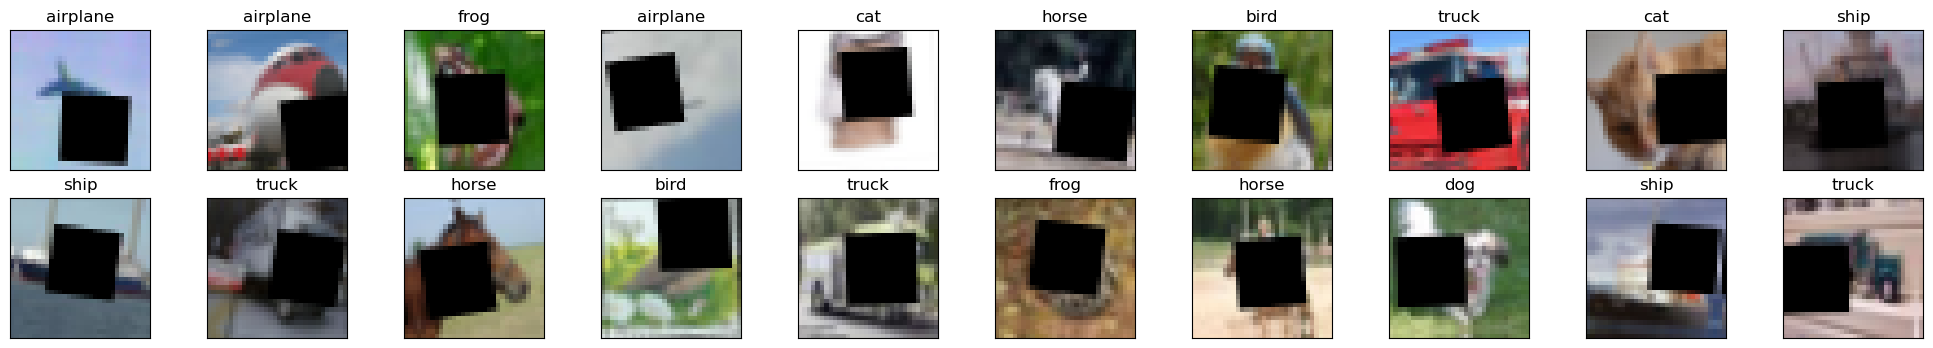

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,056
DepthwiseSeparableConv2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 15, 15]          18,432
      BatchNorm2d-12           [-1, 64, 15, 15]             128
             ReLU-13           [-1, 64, 15, 15]               0
          Dropout-14        

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.03, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.9, patience=5,
                                        verbose=True)

In [ ]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 201
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

EPOCH: 1


  0%|                                                                                                                                                                                                      | 0/391 [00:00<?, ?it/s]C:\Users\abhij\anaconda3\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.5676957368850708 Batch_id=390 Accuracy=30.71: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:18<00:00, 21.63it/s]



Test set: Average loss: 0.0129, Accuracy: 4109/10000 (41.09%)

Validation accuracy increased (0.000000 --> 41.090000).  Saving model ...
Learning rate = 0.03  for epoch:  2
EPOCH: 2


Loss=1.5215729475021362 Batch_id=390 Accuracy=40.71: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.85it/s]



Test set: Average loss: 0.0109, Accuracy: 4963/10000 (49.63%)

Validation accuracy increased (41.090000 --> 49.630000).  Saving model ...
Learning rate = 0.03  for epoch:  3
EPOCH: 3


Loss=1.4101247787475586 Batch_id=390 Accuracy=44.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.55it/s]



Test set: Average loss: 0.0104, Accuracy: 5268/10000 (52.68%)

Validation accuracy increased (49.630000 --> 52.680000).  Saving model ...
Learning rate = 0.03  for epoch:  4
EPOCH: 4


Loss=1.3918606042861938 Batch_id=390 Accuracy=47.93: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.37it/s]



Test set: Average loss: 0.0099, Accuracy: 5486/10000 (54.86%)

Validation accuracy increased (52.680000 --> 54.860000).  Saving model ...
Learning rate = 0.03  for epoch:  5
EPOCH: 5


Loss=1.4746959209442139 Batch_id=390 Accuracy=49.72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.38it/s]



Test set: Average loss: 0.0100, Accuracy: 5522/10000 (55.22%)

Validation accuracy increased (54.860000 --> 55.220000).  Saving model ...
Learning rate = 0.03  for epoch:  6
EPOCH: 6


Loss=1.629990577697754 Batch_id=390 Accuracy=51.99: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.42it/s]



Test set: Average loss: 0.0094, Accuracy: 5765/10000 (57.65%)

Validation accuracy increased (55.220000 --> 57.650000).  Saving model ...
Learning rate = 0.03  for epoch:  7
EPOCH: 7


Loss=1.3166120052337646 Batch_id=390 Accuracy=53.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.13it/s]



Test set: Average loss: 0.0100, Accuracy: 5749/10000 (57.49%)

Learning rate = 0.03  for epoch:  8
EPOCH: 8


Loss=1.2423967123031616 Batch_id=390 Accuracy=55.01: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.85it/s]



Test set: Average loss: 0.0094, Accuracy: 5954/10000 (59.54%)

Validation accuracy increased (57.650000 --> 59.540000).  Saving model ...
Learning rate = 0.03  for epoch:  9
EPOCH: 9


Loss=1.1004060506820679 Batch_id=390 Accuracy=56.17: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.81it/s]



Test set: Average loss: 0.0076, Accuracy: 6587/10000 (65.87%)

Validation accuracy increased (59.540000 --> 65.870000).  Saving model ...
Learning rate = 0.03  for epoch:  10
EPOCH: 10


Loss=1.1575305461883545 Batch_id=390 Accuracy=58.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.42it/s]



Test set: Average loss: 0.0077, Accuracy: 6628/10000 (66.28%)

Validation accuracy increased (65.870000 --> 66.280000).  Saving model ...
Learning rate = 0.03  for epoch:  11
EPOCH: 11


Loss=1.3324061632156372 Batch_id=390 Accuracy=58.49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.74it/s]



Test set: Average loss: 0.0080, Accuracy: 6482/10000 (64.82%)

Learning rate = 0.03  for epoch:  12
EPOCH: 12


Loss=1.1707308292388916 Batch_id=390 Accuracy=59.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.61it/s]



Test set: Average loss: 0.0076, Accuracy: 6576/10000 (65.76%)

Learning rate = 0.03  for epoch:  13
EPOCH: 13


Loss=1.0831531286239624 Batch_id=390 Accuracy=60.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.76it/s]



Test set: Average loss: 0.0071, Accuracy: 6772/10000 (67.72%)

Validation accuracy increased (66.280000 --> 67.720000).  Saving model ...
Learning rate = 0.03  for epoch:  14
EPOCH: 14


Loss=1.0865782499313354 Batch_id=390 Accuracy=61.35: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.44it/s]



Test set: Average loss: 0.0066, Accuracy: 7078/10000 (70.78%)

Validation accuracy increased (67.720000 --> 70.780000).  Saving model ...
Learning rate = 0.03  for epoch:  15
EPOCH: 15


Loss=0.9048405885696411 Batch_id=390 Accuracy=61.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.98it/s]



Test set: Average loss: 0.0071, Accuracy: 6883/10000 (68.83%)

Learning rate = 0.03  for epoch:  16
EPOCH: 16


Loss=0.9780576825141907 Batch_id=390 Accuracy=62.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.58it/s]



Test set: Average loss: 0.0073, Accuracy: 6828/10000 (68.28%)

Learning rate = 0.03  for epoch:  17
EPOCH: 17


Loss=0.9651325941085815 Batch_id=390 Accuracy=62.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0069, Accuracy: 6942/10000 (69.42%)

Learning rate = 0.03  for epoch:  18
EPOCH: 18


Loss=1.1364613771438599 Batch_id=390 Accuracy=62.90: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.88it/s]



Test set: Average loss: 0.0069, Accuracy: 6948/10000 (69.48%)

Learning rate = 0.03  for epoch:  19
EPOCH: 19


Loss=1.0199873447418213 Batch_id=390 Accuracy=63.48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.52it/s]



Test set: Average loss: 0.0066, Accuracy: 7017/10000 (70.17%)

Learning rate = 0.03  for epoch:  20
EPOCH: 20


Loss=0.813879132270813 Batch_id=390 Accuracy=64.02: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.55it/s]



Test set: Average loss: 0.0064, Accuracy: 7221/10000 (72.21%)

Validation accuracy increased (70.780000 --> 72.210000).  Saving model ...
Learning rate = 0.03  for epoch:  21
EPOCH: 21


Loss=1.0919485092163086 Batch_id=390 Accuracy=64.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:24<00:00, 16.01it/s]



Test set: Average loss: 0.0063, Accuracy: 7281/10000 (72.81%)

Validation accuracy increased (72.210000 --> 72.810000).  Saving model ...
Learning rate = 0.03  for epoch:  22
EPOCH: 22


Loss=0.8930028080940247 Batch_id=390 Accuracy=64.81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.76it/s]



Test set: Average loss: 0.0062, Accuracy: 7317/10000 (73.17%)

Validation accuracy increased (72.810000 --> 73.170000).  Saving model ...
Learning rate = 0.03  for epoch:  23
EPOCH: 23


Loss=0.9877986907958984 Batch_id=390 Accuracy=65.02: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.65it/s]



Test set: Average loss: 0.0069, Accuracy: 7048/10000 (70.48%)

Learning rate = 0.03  for epoch:  24
EPOCH: 24


Loss=0.9146003723144531 Batch_id=390 Accuracy=65.32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.78it/s]



Test set: Average loss: 0.0057, Accuracy: 7452/10000 (74.52%)

Validation accuracy increased (73.170000 --> 74.520000).  Saving model ...
Learning rate = 0.03  for epoch:  25
EPOCH: 25


Loss=0.8955767750740051 Batch_id=390 Accuracy=65.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.27it/s]



Test set: Average loss: 0.0057, Accuracy: 7489/10000 (74.89%)

Validation accuracy increased (74.520000 --> 74.890000).  Saving model ...
Learning rate = 0.03  for epoch:  26
EPOCH: 26


Loss=0.9782013893127441 Batch_id=390 Accuracy=66.06: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.95it/s]



Test set: Average loss: 0.0058, Accuracy: 7420/10000 (74.20%)

Learning rate = 0.03  for epoch:  27
EPOCH: 27


Loss=0.859669029712677 Batch_id=390 Accuracy=66.06: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.88it/s]



Test set: Average loss: 0.0060, Accuracy: 7407/10000 (74.07%)

Learning rate = 0.03  for epoch:  28
EPOCH: 28


Loss=0.9700604677200317 Batch_id=390 Accuracy=66.01: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.43it/s]



Test set: Average loss: 0.0057, Accuracy: 7480/10000 (74.80%)

Learning rate = 0.03  for epoch:  29
EPOCH: 29


Loss=0.9030526280403137 Batch_id=390 Accuracy=66.45: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.26it/s]



Test set: Average loss: 0.0060, Accuracy: 7372/10000 (73.72%)

Learning rate = 0.03  for epoch:  30
EPOCH: 30


Loss=0.912004828453064 Batch_id=390 Accuracy=66.51: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.71it/s]



Test set: Average loss: 0.0061, Accuracy: 7378/10000 (73.78%)

Epoch 00030: reducing learning rate of group 0 to 2.7000e-02.
Learning rate = 0.027  for epoch:  31
EPOCH: 31


Loss=0.7526746988296509 Batch_id=390 Accuracy=67.13: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.73it/s]



Test set: Average loss: 0.0055, Accuracy: 7638/10000 (76.38%)

Validation accuracy increased (74.890000 --> 76.380000).  Saving model ...
Learning rate = 0.027  for epoch:  32
EPOCH: 32


Loss=1.1040514707565308 Batch_id=390 Accuracy=67.32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.61it/s]



Test set: Average loss: 0.0059, Accuracy: 7449/10000 (74.49%)

Learning rate = 0.027  for epoch:  33
EPOCH: 33


Loss=0.8345694541931152 Batch_id=390 Accuracy=67.38: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.49it/s]



Test set: Average loss: 0.0058, Accuracy: 7498/10000 (74.98%)

Learning rate = 0.027  for epoch:  34
EPOCH: 34


Loss=0.8332499265670776 Batch_id=390 Accuracy=67.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.43it/s]



Test set: Average loss: 0.0058, Accuracy: 7494/10000 (74.94%)

Learning rate = 0.027  for epoch:  35
EPOCH: 35


Loss=0.7993912100791931 Batch_id=390 Accuracy=67.93: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.77it/s]



Test set: Average loss: 0.0057, Accuracy: 7513/10000 (75.13%)

Learning rate = 0.027  for epoch:  36
EPOCH: 36


Loss=0.8254883885383606 Batch_id=390 Accuracy=68.07: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.62it/s]



Test set: Average loss: 0.0055, Accuracy: 7625/10000 (76.25%)

Learning rate = 0.027  for epoch:  37
EPOCH: 37


Loss=1.0837339162826538 Batch_id=390 Accuracy=68.31: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.75it/s]



Test set: Average loss: 0.0052, Accuracy: 7717/10000 (77.17%)

Validation accuracy increased (76.380000 --> 77.170000).  Saving model ...
Learning rate = 0.027  for epoch:  38
EPOCH: 38


Loss=1.0105183124542236 Batch_id=390 Accuracy=68.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.93it/s]



Test set: Average loss: 0.0056, Accuracy: 7579/10000 (75.79%)

Learning rate = 0.027  for epoch:  39
EPOCH: 39


Loss=0.7884876132011414 Batch_id=390 Accuracy=68.44: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.59it/s]



Test set: Average loss: 0.0055, Accuracy: 7643/10000 (76.43%)

Learning rate = 0.027  for epoch:  40
EPOCH: 40


Loss=0.7973183989524841 Batch_id=390 Accuracy=68.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.60it/s]



Test set: Average loss: 0.0050, Accuracy: 7772/10000 (77.72%)

Validation accuracy increased (77.170000 --> 77.720000).  Saving model ...
Learning rate = 0.027  for epoch:  41
EPOCH: 41


Loss=0.7099608182907104 Batch_id=390 Accuracy=68.67: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.77it/s]



Test set: Average loss: 0.0051, Accuracy: 7808/10000 (78.08%)

Validation accuracy increased (77.720000 --> 78.080000).  Saving model ...
Learning rate = 0.027  for epoch:  42
EPOCH: 42


Loss=0.9432846903800964 Batch_id=390 Accuracy=68.65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.45it/s]



Test set: Average loss: 0.0054, Accuracy: 7693/10000 (76.93%)

Learning rate = 0.027  for epoch:  43
EPOCH: 43


Loss=0.8511744737625122 Batch_id=390 Accuracy=68.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.75it/s]



Test set: Average loss: 0.0053, Accuracy: 7688/10000 (76.88%)

Learning rate = 0.027  for epoch:  44
EPOCH: 44


Loss=0.8445018529891968 Batch_id=390 Accuracy=69.22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.50it/s]



Test set: Average loss: 0.0051, Accuracy: 7763/10000 (77.63%)

Learning rate = 0.027  for epoch:  45
EPOCH: 45


Loss=0.8019798398017883 Batch_id=390 Accuracy=69.30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.72it/s]



Test set: Average loss: 0.0050, Accuracy: 7784/10000 (77.84%)

Learning rate = 0.027  for epoch:  46
EPOCH: 46


Loss=1.027616262435913 Batch_id=390 Accuracy=69.47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.58it/s]



Test set: Average loss: 0.0054, Accuracy: 7702/10000 (77.02%)

Learning rate = 0.027  for epoch:  47
EPOCH: 47


Loss=0.929370105266571 Batch_id=390 Accuracy=69.37: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.65it/s]



Test set: Average loss: 0.0051, Accuracy: 7756/10000 (77.56%)

Epoch 00047: reducing learning rate of group 0 to 2.4300e-02.
Learning rate = 0.0243  for epoch:  48
EPOCH: 48


Loss=0.8600963354110718 Batch_id=390 Accuracy=69.65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.19it/s]



Test set: Average loss: 0.0050, Accuracy: 7862/10000 (78.62%)

Validation accuracy increased (78.080000 --> 78.620000).  Saving model ...
Learning rate = 0.0243  for epoch:  49
EPOCH: 49


Loss=0.959375262260437 Batch_id=390 Accuracy=69.88: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.60it/s]



Test set: Average loss: 0.0051, Accuracy: 7824/10000 (78.24%)

Learning rate = 0.0243  for epoch:  50
EPOCH: 50


Loss=0.8439138531684875 Batch_id=390 Accuracy=69.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.49it/s]



Test set: Average loss: 0.0052, Accuracy: 7726/10000 (77.26%)

Learning rate = 0.0243  for epoch:  51
EPOCH: 51


Loss=0.7708804607391357 Batch_id=390 Accuracy=70.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.46it/s]



Test set: Average loss: 0.0049, Accuracy: 7862/10000 (78.62%)

Validation accuracy increased (78.620000 --> 78.620000).  Saving model ...
Learning rate = 0.0243  for epoch:  52
EPOCH: 52


Loss=0.8352169990539551 Batch_id=390 Accuracy=70.17: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.13it/s]



Test set: Average loss: 0.0049, Accuracy: 7834/10000 (78.34%)

Learning rate = 0.0243  for epoch:  53
EPOCH: 53


Loss=0.8882792592048645 Batch_id=390 Accuracy=69.98: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.54it/s]



Test set: Average loss: 0.0050, Accuracy: 7848/10000 (78.48%)

Epoch 00053: reducing learning rate of group 0 to 2.1870e-02.
Learning rate = 0.02187  for epoch:  54
EPOCH: 54


Loss=0.8732239007949829 Batch_id=390 Accuracy=70.19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.92it/s]



Test set: Average loss: 0.0049, Accuracy: 7848/10000 (78.48%)

Learning rate = 0.02187  for epoch:  55
EPOCH: 55


Loss=0.9785277247428894 Batch_id=390 Accuracy=70.55: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.73it/s]



Test set: Average loss: 0.0049, Accuracy: 7833/10000 (78.33%)

Learning rate = 0.02187  for epoch:  56
EPOCH: 56


Loss=0.7856763601303101 Batch_id=390 Accuracy=70.62: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.61it/s]



Test set: Average loss: 0.0048, Accuracy: 7917/10000 (79.17%)

Validation accuracy increased (78.620000 --> 79.170000).  Saving model ...
Learning rate = 0.02187  for epoch:  57
EPOCH: 57


Loss=0.7198047637939453 Batch_id=390 Accuracy=70.88: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.33it/s]



Test set: Average loss: 0.0049, Accuracy: 7890/10000 (78.90%)

Learning rate = 0.02187  for epoch:  58
EPOCH: 58


Loss=0.6932098269462585 Batch_id=390 Accuracy=70.58: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.34it/s]



Test set: Average loss: 0.0047, Accuracy: 7948/10000 (79.48%)

Validation accuracy increased (79.170000 --> 79.480000).  Saving model ...
Learning rate = 0.02187  for epoch:  59
EPOCH: 59


Loss=0.77049720287323 Batch_id=390 Accuracy=71.07: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.52it/s]



Test set: Average loss: 0.0049, Accuracy: 7870/10000 (78.70%)

Learning rate = 0.02187  for epoch:  60
EPOCH: 60


Loss=0.6643542051315308 Batch_id=390 Accuracy=70.91: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.65it/s]



Test set: Average loss: 0.0048, Accuracy: 7902/10000 (79.02%)

Learning rate = 0.02187  for epoch:  61
EPOCH: 61


Loss=0.7636693716049194 Batch_id=390 Accuracy=71.25: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0049, Accuracy: 7877/10000 (78.77%)

Learning rate = 0.02187  for epoch:  62
EPOCH: 62


Loss=0.808862566947937 Batch_id=390 Accuracy=70.91: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0049, Accuracy: 7900/10000 (79.00%)

Epoch 00062: reducing learning rate of group 0 to 1.9683e-02.
Learning rate = 0.019683000000000003  for epoch:  63
EPOCH: 63


Loss=0.7497944831848145 Batch_id=390 Accuracy=71.66: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.51it/s]



Test set: Average loss: 0.0047, Accuracy: 7947/10000 (79.47%)

Learning rate = 0.019683000000000003  for epoch:  64
EPOCH: 64


Loss=0.7394862174987793 Batch_id=390 Accuracy=71.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.53it/s]



Test set: Average loss: 0.0047, Accuracy: 7975/10000 (79.75%)

Validation accuracy increased (79.480000 --> 79.750000).  Saving model ...
Learning rate = 0.019683000000000003  for epoch:  65
EPOCH: 65


Loss=0.742068886756897 Batch_id=390 Accuracy=71.48: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.65it/s]



Test set: Average loss: 0.0051, Accuracy: 7844/10000 (78.44%)

Learning rate = 0.019683000000000003  for epoch:  66
EPOCH: 66


Loss=0.942948043346405 Batch_id=390 Accuracy=71.63: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0050, Accuracy: 7826/10000 (78.26%)

Learning rate = 0.019683000000000003  for epoch:  67
EPOCH: 67


Loss=0.7478473782539368 Batch_id=390 Accuracy=71.30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.21it/s]



Test set: Average loss: 0.0045, Accuracy: 8044/10000 (80.44%)

Validation accuracy increased (79.750000 --> 80.440000).  Saving model ...
Learning rate = 0.019683000000000003  for epoch:  68
EPOCH: 68


Loss=0.8629757165908813 Batch_id=390 Accuracy=71.52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.06it/s]



Test set: Average loss: 0.0047, Accuracy: 7987/10000 (79.87%)

Learning rate = 0.019683000000000003  for epoch:  69
EPOCH: 69


Loss=0.8330672383308411 Batch_id=390 Accuracy=71.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.36it/s]



Test set: Average loss: 0.0047, Accuracy: 7934/10000 (79.34%)

Learning rate = 0.019683000000000003  for epoch:  70
EPOCH: 70


Loss=0.9330917596817017 Batch_id=390 Accuracy=71.75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.99it/s]



Test set: Average loss: 0.0048, Accuracy: 7906/10000 (79.06%)

Learning rate = 0.019683000000000003  for epoch:  71
EPOCH: 71


Loss=0.840589165687561 Batch_id=390 Accuracy=71.89: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.39it/s]



Test set: Average loss: 0.0047, Accuracy: 7978/10000 (79.78%)

Learning rate = 0.019683000000000003  for epoch:  72
EPOCH: 72


Loss=0.8401018381118774 Batch_id=390 Accuracy=71.87: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.66it/s]



Test set: Average loss: 0.0046, Accuracy: 8026/10000 (80.26%)

Learning rate = 0.019683000000000003  for epoch:  73
EPOCH: 73


Loss=0.812460720539093 Batch_id=390 Accuracy=71.82: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.77it/s]



Test set: Average loss: 0.0048, Accuracy: 7952/10000 (79.52%)

Epoch 00073: reducing learning rate of group 0 to 1.7715e-02.
Learning rate = 0.017714700000000003  for epoch:  74
EPOCH: 74


Loss=0.7826352715492249 Batch_id=390 Accuracy=71.71: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0046, Accuracy: 8010/10000 (80.10%)

Learning rate = 0.017714700000000003  for epoch:  75
EPOCH: 75


Loss=0.7982891798019409 Batch_id=390 Accuracy=72.14: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.30it/s]



Test set: Average loss: 0.0045, Accuracy: 8032/10000 (80.32%)

Learning rate = 0.017714700000000003  for epoch:  76
EPOCH: 76


Loss=0.690601110458374 Batch_id=390 Accuracy=72.32: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.54it/s]



Test set: Average loss: 0.0045, Accuracy: 8050/10000 (80.50%)

Validation accuracy increased (80.440000 --> 80.500000).  Saving model ...
Learning rate = 0.017714700000000003  for epoch:  77
EPOCH: 77


Loss=0.6660095453262329 Batch_id=390 Accuracy=72.22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.02it/s]



Test set: Average loss: 0.0047, Accuracy: 8019/10000 (80.19%)

Learning rate = 0.017714700000000003  for epoch:  78
EPOCH: 78


Loss=0.9859517216682434 Batch_id=390 Accuracy=72.22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.55it/s]



Test set: Average loss: 0.0046, Accuracy: 8018/10000 (80.18%)

Learning rate = 0.017714700000000003  for epoch:  79
EPOCH: 79


Loss=0.7447737455368042 Batch_id=390 Accuracy=72.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.47it/s]



Test set: Average loss: 0.0046, Accuracy: 7999/10000 (79.99%)

Epoch 00079: reducing learning rate of group 0 to 1.5943e-02.
Learning rate = 0.015943230000000003  for epoch:  80
EPOCH: 80


Loss=0.7791840434074402 Batch_id=390 Accuracy=72.45: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.28it/s]



Test set: Average loss: 0.0044, Accuracy: 8119/10000 (81.19%)

Validation accuracy increased (80.500000 --> 81.190000).  Saving model ...
Learning rate = 0.015943230000000003  for epoch:  81
EPOCH: 81


Loss=0.7393368482589722 Batch_id=390 Accuracy=72.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.60it/s]



Test set: Average loss: 0.0045, Accuracy: 8017/10000 (80.17%)

Learning rate = 0.015943230000000003  for epoch:  82
EPOCH: 82


Loss=0.7363690137863159 Batch_id=390 Accuracy=72.48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.35it/s]



Test set: Average loss: 0.0045, Accuracy: 8067/10000 (80.67%)

Learning rate = 0.015943230000000003  for epoch:  83
EPOCH: 83


Loss=0.8781334757804871 Batch_id=390 Accuracy=72.81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.52it/s]



Test set: Average loss: 0.0043, Accuracy: 8153/10000 (81.53%)

Validation accuracy increased (81.190000 --> 81.530000).  Saving model ...
Learning rate = 0.015943230000000003  for epoch:  84
EPOCH: 84


Loss=0.7358173727989197 Batch_id=390 Accuracy=72.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.62it/s]



Test set: Average loss: 0.0047, Accuracy: 7994/10000 (79.94%)

Learning rate = 0.015943230000000003  for epoch:  85
EPOCH: 85


Loss=0.6976951360702515 Batch_id=390 Accuracy=72.57: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.97it/s]



Test set: Average loss: 0.0045, Accuracy: 8068/10000 (80.68%)

Learning rate = 0.015943230000000003  for epoch:  86
EPOCH: 86


Loss=0.9441315531730652 Batch_id=390 Accuracy=72.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.21it/s]



Test set: Average loss: 0.0045, Accuracy: 8079/10000 (80.79%)

Learning rate = 0.015943230000000003  for epoch:  87
EPOCH: 87


Loss=0.7920742630958557 Batch_id=390 Accuracy=72.66: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.62it/s]



Test set: Average loss: 0.0044, Accuracy: 8110/10000 (81.10%)

Learning rate = 0.015943230000000003  for epoch:  88
EPOCH: 88


Loss=0.7338604927062988 Batch_id=390 Accuracy=72.69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.71it/s]



Test set: Average loss: 0.0044, Accuracy: 8071/10000 (80.71%)

Learning rate = 0.015943230000000003  for epoch:  89
EPOCH: 89


Loss=0.8502923250198364 Batch_id=390 Accuracy=72.91: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.87it/s]



Test set: Average loss: 0.0044, Accuracy: 8119/10000 (81.19%)

Epoch 00089: reducing learning rate of group 0 to 1.4349e-02.
Learning rate = 0.014348907000000003  for epoch:  90
EPOCH: 90


Loss=0.7760211825370789 Batch_id=390 Accuracy=72.97: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.15it/s]



Test set: Average loss: 0.0044, Accuracy: 8124/10000 (81.24%)

Learning rate = 0.014348907000000003  for epoch:  91
EPOCH: 91


Loss=0.9992753863334656 Batch_id=390 Accuracy=73.15: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.0045, Accuracy: 8073/10000 (80.73%)

Learning rate = 0.014348907000000003  for epoch:  92
EPOCH: 92


Loss=0.9510389566421509 Batch_id=390 Accuracy=73.06: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0045, Accuracy: 8070/10000 (80.70%)

Learning rate = 0.014348907000000003  for epoch:  93
EPOCH: 93


Loss=0.8330574035644531 Batch_id=390 Accuracy=73.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.94it/s]



Test set: Average loss: 0.0044, Accuracy: 8106/10000 (81.06%)

Learning rate = 0.014348907000000003  for epoch:  94
EPOCH: 94


Loss=0.884596049785614 Batch_id=390 Accuracy=73.20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.87it/s]



Test set: Average loss: 0.0045, Accuracy: 8038/10000 (80.38%)

Learning rate = 0.014348907000000003  for epoch:  95
EPOCH: 95


Loss=0.9069610834121704 Batch_id=390 Accuracy=73.31: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.59it/s]



Test set: Average loss: 0.0046, Accuracy: 8050/10000 (80.50%)

Epoch 00095: reducing learning rate of group 0 to 1.2914e-02.
Learning rate = 0.012914016300000003  for epoch:  96
EPOCH: 96


Loss=0.9477803111076355 Batch_id=390 Accuracy=73.22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.19it/s]



Test set: Average loss: 0.0044, Accuracy: 8124/10000 (81.24%)

Learning rate = 0.012914016300000003  for epoch:  97
EPOCH: 97


Loss=0.5984323024749756 Batch_id=390 Accuracy=73.28: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.64it/s]



Test set: Average loss: 0.0046, Accuracy: 8033/10000 (80.33%)

Learning rate = 0.012914016300000003  for epoch:  98
EPOCH: 98


Loss=0.8049341440200806 Batch_id=390 Accuracy=73.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0044, Accuracy: 8065/10000 (80.65%)

Learning rate = 0.012914016300000003  for epoch:  99
EPOCH: 99


Loss=0.7775920033454895 Batch_id=390 Accuracy=73.42: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0045, Accuracy: 8122/10000 (81.22%)

Learning rate = 0.012914016300000003  for epoch:  100
EPOCH: 100


Loss=0.8235461115837097 Batch_id=390 Accuracy=73.43: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.29it/s]



Test set: Average loss: 0.0045, Accuracy: 8119/10000 (81.19%)

Learning rate = 0.012914016300000003  for epoch:  101
EPOCH: 101


Loss=0.6954368352890015 Batch_id=390 Accuracy=73.35: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.64it/s]



Test set: Average loss: 0.0045, Accuracy: 8115/10000 (81.15%)

Epoch 00101: reducing learning rate of group 0 to 1.1623e-02.
Learning rate = 0.011622614670000003  for epoch:  102
EPOCH: 102


Loss=0.9295743107795715 Batch_id=390 Accuracy=73.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.64it/s]



Test set: Average loss: 0.0045, Accuracy: 8096/10000 (80.96%)

Learning rate = 0.011622614670000003  for epoch:  103
EPOCH: 103


Loss=0.9308210611343384 Batch_id=390 Accuracy=73.72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.76it/s]



Test set: Average loss: 0.0044, Accuracy: 8075/10000 (80.75%)

Learning rate = 0.011622614670000003  for epoch:  104
EPOCH: 104


Loss=0.7673435807228088 Batch_id=390 Accuracy=73.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.19it/s]



Test set: Average loss: 0.0043, Accuracy: 8165/10000 (81.65%)

Validation accuracy increased (81.530000 --> 81.650000).  Saving model ...
Learning rate = 0.011622614670000003  for epoch:  105
EPOCH: 105


Loss=0.685932457447052 Batch_id=390 Accuracy=73.62: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0043, Accuracy: 8134/10000 (81.34%)

Learning rate = 0.011622614670000003  for epoch:  106
EPOCH: 106


Loss=1.0986008644104004 Batch_id=390 Accuracy=73.69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.01it/s]



Test set: Average loss: 0.0047, Accuracy: 8015/10000 (80.15%)

Learning rate = 0.011622614670000003  for epoch:  107
EPOCH: 107


Loss=0.8124675750732422 Batch_id=390 Accuracy=73.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0046, Accuracy: 8073/10000 (80.73%)

Epoch 00107: reducing learning rate of group 0 to 1.0460e-02.
Learning rate = 0.010460353203000003  for epoch:  108
EPOCH: 108


Loss=0.6398577094078064 Batch_id=390 Accuracy=73.78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.08it/s]



Test set: Average loss: 0.0043, Accuracy: 8132/10000 (81.32%)

Learning rate = 0.010460353203000003  for epoch:  109
EPOCH: 109


Loss=0.8778187036514282 Batch_id=390 Accuracy=73.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.94it/s]



Test set: Average loss: 0.0044, Accuracy: 8126/10000 (81.26%)

Learning rate = 0.010460353203000003  for epoch:  110
EPOCH: 110


Loss=0.7067722678184509 Batch_id=390 Accuracy=73.94: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.36it/s]



Test set: Average loss: 0.0043, Accuracy: 8127/10000 (81.27%)

Learning rate = 0.010460353203000003  for epoch:  111
EPOCH: 111


Loss=0.7894256114959717 Batch_id=390 Accuracy=74.01: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.96it/s]



Test set: Average loss: 0.0043, Accuracy: 8125/10000 (81.25%)

Learning rate = 0.010460353203000003  for epoch:  112
EPOCH: 112


Loss=0.6591295003890991 Batch_id=390 Accuracy=73.62: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.14it/s]



Test set: Average loss: 0.0046, Accuracy: 8072/10000 (80.72%)

Learning rate = 0.010460353203000003  for epoch:  113
EPOCH: 113


Loss=0.7174517512321472 Batch_id=390 Accuracy=74.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.89it/s]



Test set: Average loss: 0.0044, Accuracy: 8146/10000 (81.46%)

Epoch 00113: reducing learning rate of group 0 to 9.4143e-03.
Learning rate = 0.009414317882700002  for epoch:  114
EPOCH: 114


Loss=0.8564367294311523 Batch_id=390 Accuracy=73.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.76it/s]



Test set: Average loss: 0.0043, Accuracy: 8164/10000 (81.64%)

Learning rate = 0.009414317882700002  for epoch:  115
EPOCH: 115


Loss=0.6053719520568848 Batch_id=390 Accuracy=74.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.50it/s]



Test set: Average loss: 0.0042, Accuracy: 8173/10000 (81.73%)

Validation accuracy increased (81.650000 --> 81.730000).  Saving model ...
Learning rate = 0.009414317882700002  for epoch:  116
EPOCH: 116


Loss=0.7209240794181824 Batch_id=390 Accuracy=74.05: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:23<00:00, 16.76it/s]



Test set: Average loss: 0.0042, Accuracy: 8217/10000 (82.17%)

Validation accuracy increased (81.730000 --> 82.170000).  Saving model ...
Learning rate = 0.009414317882700002  for epoch:  117
EPOCH: 117


Loss=0.7217090725898743 Batch_id=390 Accuracy=74.02: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.25it/s]



Test set: Average loss: 0.0044, Accuracy: 8115/10000 (81.15%)

Learning rate = 0.009414317882700002  for epoch:  118
EPOCH: 118


Loss=0.7547982335090637 Batch_id=390 Accuracy=74.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.80it/s]



Test set: Average loss: 0.0042, Accuracy: 8189/10000 (81.89%)

Learning rate = 0.009414317882700002  for epoch:  119
EPOCH: 119


Loss=0.6267866492271423 Batch_id=390 Accuracy=73.99: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.13it/s]



Test set: Average loss: 0.0044, Accuracy: 8141/10000 (81.41%)

Epoch 00119: reducing learning rate of group 0 to 8.4729e-03.
Learning rate = 0.008472886094430003  for epoch:  120
EPOCH: 120


Loss=0.6577097773551941 Batch_id=390 Accuracy=74.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.51it/s]



Test set: Average loss: 0.0042, Accuracy: 8165/10000 (81.65%)

Learning rate = 0.008472886094430003  for epoch:  121
EPOCH: 121


Loss=0.7873271107673645 Batch_id=390 Accuracy=74.32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.33it/s]



Test set: Average loss: 0.0044, Accuracy: 8101/10000 (81.01%)

Learning rate = 0.008472886094430003  for epoch:  122
EPOCH: 122


Loss=0.6151744723320007 Batch_id=390 Accuracy=74.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:25<00:00, 15.30it/s]



Test set: Average loss: 0.0044, Accuracy: 8119/10000 (81.19%)

Learning rate = 0.008472886094430003  for epoch:  123
EPOCH: 123


Loss=0.8989807367324829 Batch_id=390 Accuracy=74.38: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.37it/s]



Test set: Average loss: 0.0044, Accuracy: 8108/10000 (81.08%)

Learning rate = 0.008472886094430003  for epoch:  124
EPOCH: 124


Loss=0.9791463613510132 Batch_id=390 Accuracy=74.31: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.19it/s]



Test set: Average loss: 0.0043, Accuracy: 8171/10000 (81.71%)

Learning rate = 0.008472886094430003  for epoch:  125
EPOCH: 125


Loss=0.7083107233047485 Batch_id=390 Accuracy=74.50: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.43it/s]



Test set: Average loss: 0.0041, Accuracy: 8225/10000 (82.25%)

Validation accuracy increased (82.170000 --> 82.250000).  Saving model ...
Epoch 00125: reducing learning rate of group 0 to 7.6256e-03.
Learning rate = 0.007625597484987002  for epoch:  126
EPOCH: 126


Loss=0.7926701307296753 Batch_id=390 Accuracy=74.50: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.37it/s]



Test set: Average loss: 0.0042, Accuracy: 8212/10000 (82.12%)

Learning rate = 0.007625597484987002  for epoch:  127
EPOCH: 127


Loss=0.7277816534042358 Batch_id=390 Accuracy=74.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.38it/s]



Test set: Average loss: 0.0042, Accuracy: 8189/10000 (81.89%)

Learning rate = 0.007625597484987002  for epoch:  128
EPOCH: 128


Loss=0.6603254079818726 Batch_id=390 Accuracy=74.42: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.31it/s]



Test set: Average loss: 0.0042, Accuracy: 8168/10000 (81.68%)

Learning rate = 0.007625597484987002  for epoch:  129
EPOCH: 129


Loss=0.7188354730606079 Batch_id=390 Accuracy=74.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.42it/s]



Test set: Average loss: 0.0041, Accuracy: 8201/10000 (82.01%)

Learning rate = 0.007625597484987002  for epoch:  130
EPOCH: 130


Loss=0.6848064064979553 Batch_id=390 Accuracy=74.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.53it/s]



Test set: Average loss: 0.0042, Accuracy: 8212/10000 (82.12%)

Learning rate = 0.007625597484987002  for epoch:  131
EPOCH: 131


Loss=0.8699166178703308 Batch_id=390 Accuracy=74.37: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.24it/s]



Test set: Average loss: 0.0042, Accuracy: 8182/10000 (81.82%)

Epoch 00131: reducing learning rate of group 0 to 6.8630e-03.
Learning rate = 0.006863037736488302  for epoch:  132
EPOCH: 132


Loss=0.8418170809745789 Batch_id=390 Accuracy=74.47: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.90it/s]



Test set: Average loss: 0.0042, Accuracy: 8162/10000 (81.62%)

Learning rate = 0.006863037736488302  for epoch:  133
EPOCH: 133


Loss=0.5941637754440308 Batch_id=390 Accuracy=74.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.32it/s]



Test set: Average loss: 0.0042, Accuracy: 8206/10000 (82.06%)

Learning rate = 0.006863037736488302  for epoch:  134
EPOCH: 134


Loss=0.7742806673049927 Batch_id=390 Accuracy=74.75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.43it/s]



Test set: Average loss: 0.0042, Accuracy: 8184/10000 (81.84%)

Learning rate = 0.006863037736488302  for epoch:  135
EPOCH: 135


Loss=0.8188815116882324 Batch_id=390 Accuracy=74.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.96it/s]



Test set: Average loss: 0.0042, Accuracy: 8219/10000 (82.19%)

Learning rate = 0.006863037736488302  for epoch:  136
EPOCH: 136


Loss=0.6357175707817078 Batch_id=390 Accuracy=74.82: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.17it/s]



Test set: Average loss: 0.0042, Accuracy: 8194/10000 (81.94%)

Learning rate = 0.006863037736488302  for epoch:  137
EPOCH: 137


Loss=0.6208140850067139 Batch_id=390 Accuracy=74.72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.35it/s]



Test set: Average loss: 0.0042, Accuracy: 8200/10000 (82.00%)

Epoch 00137: reducing learning rate of group 0 to 6.1767e-03.
Learning rate = 0.0061767339628394724  for epoch:  138
EPOCH: 138


Loss=0.6022542715072632 Batch_id=390 Accuracy=74.41: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.17it/s]



Test set: Average loss: 0.0041, Accuracy: 8256/10000 (82.56%)

Validation accuracy increased (82.250000 --> 82.560000).  Saving model ...
Learning rate = 0.0061767339628394724  for epoch:  139
EPOCH: 139


Loss=0.9472706913948059 Batch_id=390 Accuracy=74.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.33it/s]



Test set: Average loss: 0.0042, Accuracy: 8217/10000 (82.17%)

Learning rate = 0.0061767339628394724  for epoch:  140
EPOCH: 140


Loss=0.788360059261322 Batch_id=390 Accuracy=74.88: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.15it/s]



Test set: Average loss: 0.0041, Accuracy: 8243/10000 (82.43%)

Learning rate = 0.0061767339628394724  for epoch:  141
EPOCH: 141


Loss=0.7933165431022644 Batch_id=390 Accuracy=74.69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.61it/s]



Test set: Average loss: 0.0041, Accuracy: 8198/10000 (81.98%)

Learning rate = 0.0061767339628394724  for epoch:  142
EPOCH: 142


Loss=0.9265214800834656 Batch_id=390 Accuracy=74.79: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.73it/s]



Test set: Average loss: 0.0042, Accuracy: 8205/10000 (82.05%)

Learning rate = 0.0061767339628394724  for epoch:  143
EPOCH: 143


Loss=0.6608954071998596 Batch_id=390 Accuracy=74.63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.17it/s]



Test set: Average loss: 0.0041, Accuracy: 8235/10000 (82.35%)

Learning rate = 0.0061767339628394724  for epoch:  144
EPOCH: 144


Loss=0.636177122592926 Batch_id=390 Accuracy=74.79: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.95it/s]



Test set: Average loss: 0.0042, Accuracy: 8172/10000 (81.72%)

Epoch 00144: reducing learning rate of group 0 to 5.5591e-03.
Learning rate = 0.005559060566555525  for epoch:  145
EPOCH: 145


Loss=0.7200624942779541 Batch_id=390 Accuracy=74.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 13.98it/s]



Test set: Average loss: 0.0042, Accuracy: 8223/10000 (82.23%)

Learning rate = 0.005559060566555525  for epoch:  146
EPOCH: 146


Loss=0.7648161053657532 Batch_id=390 Accuracy=74.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.32it/s]



Test set: Average loss: 0.0040, Accuracy: 8244/10000 (82.44%)

Learning rate = 0.005559060566555525  for epoch:  147
EPOCH: 147


Loss=0.7296947240829468 Batch_id=390 Accuracy=75.10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.20it/s]



Test set: Average loss: 0.0041, Accuracy: 8277/10000 (82.77%)

Validation accuracy increased (82.560000 --> 82.770000).  Saving model ...
Learning rate = 0.005559060566555525  for epoch:  148
EPOCH: 148


Loss=0.7337604761123657 Batch_id=390 Accuracy=74.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.36it/s]



Test set: Average loss: 0.0041, Accuracy: 8255/10000 (82.55%)

Learning rate = 0.005559060566555525  for epoch:  149
EPOCH: 149


Loss=0.7317488789558411 Batch_id=390 Accuracy=74.94: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.38it/s]



Test set: Average loss: 0.0041, Accuracy: 8275/10000 (82.75%)

Learning rate = 0.005559060566555525  for epoch:  150
EPOCH: 150


Loss=0.7232749462127686 Batch_id=390 Accuracy=74.81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.35it/s]



Test set: Average loss: 0.0041, Accuracy: 8241/10000 (82.41%)

Epoch 00150: reducing learning rate of group 0 to 5.0032e-03.
Learning rate = 0.005003154509899972  for epoch:  151
EPOCH: 151


Loss=0.6739251613616943 Batch_id=390 Accuracy=74.82: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0041, Accuracy: 8234/10000 (82.34%)

Learning rate = 0.005003154509899972  for epoch:  152
EPOCH: 152


Loss=0.7310374975204468 Batch_id=390 Accuracy=74.95: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.25it/s]



Test set: Average loss: 0.0042, Accuracy: 8190/10000 (81.90%)

Learning rate = 0.005003154509899972  for epoch:  153
EPOCH: 153


Loss=0.9192808866500854 Batch_id=390 Accuracy=75.04: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.47it/s]



Test set: Average loss: 0.0042, Accuracy: 8216/10000 (82.16%)

Learning rate = 0.005003154509899972  for epoch:  154
EPOCH: 154


Loss=0.7403759956359863 Batch_id=390 Accuracy=75.16: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0043, Accuracy: 8183/10000 (81.83%)

Learning rate = 0.005003154509899972  for epoch:  155
EPOCH: 155


Loss=0.7025471925735474 Batch_id=390 Accuracy=75.25: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.44it/s]



Test set: Average loss: 0.0042, Accuracy: 8234/10000 (82.34%)

Learning rate = 0.005003154509899972  for epoch:  156
EPOCH: 156


Loss=0.5402306318283081 Batch_id=390 Accuracy=75.06: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.14it/s]



Test set: Average loss: 0.0040, Accuracy: 8254/10000 (82.54%)

Epoch 00156: reducing learning rate of group 0 to 4.5028e-03.
Learning rate = 0.004502839058909975  for epoch:  157
EPOCH: 157


Loss=0.7967749238014221 Batch_id=390 Accuracy=75.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.10it/s]



Test set: Average loss: 0.0042, Accuracy: 8218/10000 (82.18%)

Learning rate = 0.004502839058909975  for epoch:  158
EPOCH: 158


Loss=0.7295593619346619 Batch_id=390 Accuracy=74.94: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.06it/s]



Test set: Average loss: 0.0041, Accuracy: 8234/10000 (82.34%)

Learning rate = 0.004502839058909975  for epoch:  159
EPOCH: 159


Loss=0.6389944553375244 Batch_id=390 Accuracy=75.27: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.00it/s]



Test set: Average loss: 0.0041, Accuracy: 8236/10000 (82.36%)

Learning rate = 0.004502839058909975  for epoch:  160
EPOCH: 160


Loss=0.7554314732551575 Batch_id=390 Accuracy=75.38: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.33it/s]



Test set: Average loss: 0.0042, Accuracy: 8213/10000 (82.13%)

Learning rate = 0.004502839058909975  for epoch:  161
EPOCH: 161


Loss=0.6329212188720703 Batch_id=390 Accuracy=75.29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.53it/s]



Test set: Average loss: 0.0041, Accuracy: 8249/10000 (82.49%)

Learning rate = 0.004502839058909975  for epoch:  162
EPOCH: 162


Loss=0.9132344126701355 Batch_id=390 Accuracy=75.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.35it/s]



Test set: Average loss: 0.0041, Accuracy: 8257/10000 (82.57%)

Epoch 00162: reducing learning rate of group 0 to 4.0526e-03.
Learning rate = 0.004052555153018977  for epoch:  163
EPOCH: 163


Loss=0.5561728477478027 Batch_id=390 Accuracy=75.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.36it/s]



Test set: Average loss: 0.0042, Accuracy: 8219/10000 (82.19%)

Learning rate = 0.004052555153018977  for epoch:  164
EPOCH: 164


Loss=0.8135251998901367 Batch_id=390 Accuracy=75.49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.36it/s]



Test set: Average loss: 0.0041, Accuracy: 8252/10000 (82.52%)

Learning rate = 0.004052555153018977  for epoch:  165
EPOCH: 165


Loss=0.4880647659301758 Batch_id=390 Accuracy=75.19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.39it/s]



Test set: Average loss: 0.0041, Accuracy: 8252/10000 (82.52%)

Learning rate = 0.004052555153018977  for epoch:  166
EPOCH: 166


Loss=0.6447237133979797 Batch_id=390 Accuracy=75.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.22it/s]



Test set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)

Learning rate = 0.004052555153018977  for epoch:  167
EPOCH: 167


Loss=0.6971637010574341 Batch_id=390 Accuracy=75.37: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.33it/s]



Test set: Average loss: 0.0042, Accuracy: 8210/10000 (82.10%)

Learning rate = 0.004052555153018977  for epoch:  168
EPOCH: 168


Loss=0.79445481300354 Batch_id=390 Accuracy=75.36: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.32it/s]



Test set: Average loss: 0.0042, Accuracy: 8221/10000 (82.21%)

Epoch 00168: reducing learning rate of group 0 to 3.6473e-03.
Learning rate = 0.0036472996377170793  for epoch:  169
EPOCH: 169


Loss=0.6220387816429138 Batch_id=390 Accuracy=75.07: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.46it/s]



Test set: Average loss: 0.0040, Accuracy: 8277/10000 (82.77%)

Validation accuracy increased (82.770000 --> 82.770000).  Saving model ...
Learning rate = 0.0036472996377170793  for epoch:  170
EPOCH: 170


Loss=0.5454081296920776 Batch_id=390 Accuracy=75.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.28it/s]



Test set: Average loss: 0.0041, Accuracy: 8241/10000 (82.41%)

Learning rate = 0.0036472996377170793  for epoch:  171
EPOCH: 171


Loss=0.7891591787338257 Batch_id=390 Accuracy=75.38: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.22it/s]



Test set: Average loss: 0.0041, Accuracy: 8258/10000 (82.58%)

Learning rate = 0.0036472996377170793  for epoch:  172
EPOCH: 172


Loss=1.0558568239212036 Batch_id=390 Accuracy=75.42: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.36it/s]



Test set: Average loss: 0.0044, Accuracy: 8171/10000 (81.71%)

Learning rate = 0.0036472996377170793  for epoch:  173
EPOCH: 173


Loss=0.784899115562439 Batch_id=390 Accuracy=75.28: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.36it/s]



Test set: Average loss: 0.0041, Accuracy: 8239/10000 (82.39%)

Learning rate = 0.0036472996377170793  for epoch:  174
EPOCH: 174


Loss=0.762627124786377 Batch_id=390 Accuracy=75.21: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.34it/s]



Test set: Average loss: 0.0041, Accuracy: 8267/10000 (82.67%)

Epoch 00174: reducing learning rate of group 0 to 3.2826e-03.
Learning rate = 0.0032825696739453717  for epoch:  175
EPOCH: 175


Loss=0.9017875790596008 Batch_id=390 Accuracy=75.41: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.15it/s]



Test set: Average loss: 0.0043, Accuracy: 8199/10000 (81.99%)

Learning rate = 0.0032825696739453717  for epoch:  176
EPOCH: 176


Loss=0.6069811582565308 Batch_id=390 Accuracy=75.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.85it/s]



Test set: Average loss: 0.0042, Accuracy: 8226/10000 (82.26%)

Learning rate = 0.0032825696739453717  for epoch:  177
EPOCH: 177


Loss=0.8399609327316284 Batch_id=390 Accuracy=75.19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.02it/s]



Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

Learning rate = 0.0032825696739453717  for epoch:  178
EPOCH: 178


Loss=0.6523216366767883 Batch_id=390 Accuracy=75.20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.03it/s]



Test set: Average loss: 0.0041, Accuracy: 8266/10000 (82.66%)

Learning rate = 0.0032825696739453717  for epoch:  179
EPOCH: 179


Loss=0.5652504563331604 Batch_id=390 Accuracy=75.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.66it/s]



Test set: Average loss: 0.0041, Accuracy: 8241/10000 (82.41%)

Learning rate = 0.0032825696739453717  for epoch:  180
EPOCH: 180


Loss=0.7489526867866516 Batch_id=390 Accuracy=75.67: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.75it/s]



Test set: Average loss: 0.0041, Accuracy: 8242/10000 (82.42%)

Epoch 00180: reducing learning rate of group 0 to 2.9543e-03.
Learning rate = 0.0029543127065508345  for epoch:  181
EPOCH: 181


Loss=0.6736444234848022 Batch_id=390 Accuracy=75.81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.40it/s]



Test set: Average loss: 0.0040, Accuracy: 8263/10000 (82.63%)

Learning rate = 0.0029543127065508345  for epoch:  182
EPOCH: 182


Loss=0.6479900479316711 Batch_id=390 Accuracy=75.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.14it/s]



Test set: Average loss: 0.0040, Accuracy: 8286/10000 (82.86%)

Validation accuracy increased (82.770000 --> 82.860000).  Saving model ...
Learning rate = 0.0029543127065508345  for epoch:  183
EPOCH: 183


Loss=0.9113090634346008 Batch_id=390 Accuracy=75.48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:26<00:00, 14.78it/s]



Test set: Average loss: 0.0041, Accuracy: 8256/10000 (82.56%)

Learning rate = 0.0029543127065508345  for epoch:  184
EPOCH: 184


Loss=0.8605688214302063 Batch_id=390 Accuracy=75.39: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 14.18it/s]



Test set: Average loss: 0.0040, Accuracy: 8292/10000 (82.92%)

Validation accuracy increased (82.860000 --> 82.920000).  Saving model ...
Learning rate = 0.0029543127065508345  for epoch:  185
EPOCH: 185


Loss=0.6552225351333618 Batch_id=390 Accuracy=75.29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:29<00:00, 13.46it/s]



Test set: Average loss: 0.0041, Accuracy: 8238/10000 (82.38%)

Learning rate = 0.0029543127065508345  for epoch:  186
EPOCH: 186


Loss=0.7932536005973816 Batch_id=390 Accuracy=75.74: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.62it/s]



Test set: Average loss: 0.0041, Accuracy: 8245/10000 (82.45%)

Epoch 00186: reducing learning rate of group 0 to 2.6589e-03.
Learning rate = 0.002658881435895751  for epoch:  187
EPOCH: 187


Loss=0.7381945848464966 Batch_id=390 Accuracy=75.65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:29<00:00, 13.35it/s]



Test set: Average loss: 0.0042, Accuracy: 8252/10000 (82.52%)

Learning rate = 0.002658881435895751  for epoch:  188
EPOCH: 188


Loss=0.5536023378372192 Batch_id=390 Accuracy=75.61: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 13.99it/s]



Test set: Average loss: 0.0040, Accuracy: 8299/10000 (82.99%)

Validation accuracy increased (82.920000 --> 82.990000).  Saving model ...
Learning rate = 0.002658881435895751  for epoch:  189
EPOCH: 189


Loss=0.6961430311203003 Batch_id=390 Accuracy=75.57: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:30<00:00, 12.89it/s]



Test set: Average loss: 0.0040, Accuracy: 8271/10000 (82.71%)

Learning rate = 0.002658881435895751  for epoch:  190
EPOCH: 190


Loss=0.6171402931213379 Batch_id=390 Accuracy=75.61: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:30<00:00, 12.97it/s]



Test set: Average loss: 0.0041, Accuracy: 8253/10000 (82.53%)

Learning rate = 0.002658881435895751  for epoch:  191
EPOCH: 191


Loss=0.6451244354248047 Batch_id=390 Accuracy=75.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.72it/s]



Test set: Average loss: 0.0041, Accuracy: 8254/10000 (82.54%)

Learning rate = 0.002658881435895751  for epoch:  192
EPOCH: 192


Loss=0.6074718236923218 Batch_id=390 Accuracy=75.67: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.93it/s]



Test set: Average loss: 0.0040, Accuracy: 8281/10000 (82.81%)

Epoch 00192: reducing learning rate of group 0 to 2.3930e-03.
Learning rate = 0.002392993292306176  for epoch:  193
EPOCH: 193


Loss=0.6421353220939636 Batch_id=390 Accuracy=75.64: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:27<00:00, 13.97it/s]



Test set: Average loss: 0.0041, Accuracy: 8276/10000 (82.76%)

Learning rate = 0.002392993292306176  for epoch:  194
EPOCH: 194


Loss=0.6868264675140381 Batch_id=390 Accuracy=75.52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.83it/s]



Test set: Average loss: 0.0040, Accuracy: 8289/10000 (82.89%)

Learning rate = 0.002392993292306176  for epoch:  195
EPOCH: 195


Loss=0.7626842856407166 Batch_id=390 Accuracy=75.88: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:28<00:00, 13.83it/s]



Test set: Average loss: 0.0041, Accuracy: 8272/10000 (82.72%)

Learning rate = 0.002392993292306176  for epoch:  196
EPOCH: 196


Loss=0.6857674717903137 Batch_id=40 Accuracy=76.31:  10%|██████████████                                                                                                                           | 40/391 [00:14<00:17, 20.18it/s]

In [ ]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [ ]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [ ]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)